<a href="https://colab.research.google.com/github/hadush16/Intelligent-Call-Anti-Theft-with-Advanced-Features/blob/main/Intelligent_Call_Anti_Theft_with_Advanced_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition
!pip install opencv-python


In [5]:
!pip install face_recognition

In [6]:
!pip show face_recognition

Name: face-recognition
Version: 1.3.0
Summary: Recognize faces from Python or from the command line
Home-page: https://github.com/ageitgey/face_recognition
Author: Adam Geitgey
Author-email: ageitgey@gmail.com
License: MIT license
Location: /usr/local/lib/python3.11/dist-packages
Requires: Click, dlib, face-recognition-models, numpy, Pillow
Required-by: 


In [3]:
!pip install -U tensorflow

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112, 112)
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 67 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(input_shape=(112, 112, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze backbone for faster training

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation='softmax')(x)  # 3 classes for 3 persons

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


<ipython-input-5-91ab5b245b6f>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(112, 112, 3), include_top=False, weights='imagenet')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 112, 112, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 56, 56, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 56, 56, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 56, 56, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 56, 56, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 56, 56, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 56, 56, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 56, 56, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 56, 56, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 57, 57, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 28, 28, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
EPOCHS = 30

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6082 - loss: 1.0471 - val_accuracy: 0.5333 - val_loss: 1.2940
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7038 - loss: 0.7739 - val_accuracy: 0.4667 - val_loss: 1.3354
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7545 - loss: 0.5126 - val_accuracy: 0.3333 - val_loss: 1.5311
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7476 - loss: 0.6564 - val_accuracy: 0.4000 - val_loss: 1.5919
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8554 - loss: 0.4120 - val_accuracy: 0.4667 - val_loss: 1.6636
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8198 - loss: 0.3945 - val_accuracy: 0.4000 - val_loss: 1.8510
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8192 - loss: 0.4964 - val_accuracy: 0.4667 - val_loss: 1.5427
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8794 - loss: 0.2651 - val_accuracy: 0.4000 - val_loss: 1.4078
Epoch 9/30

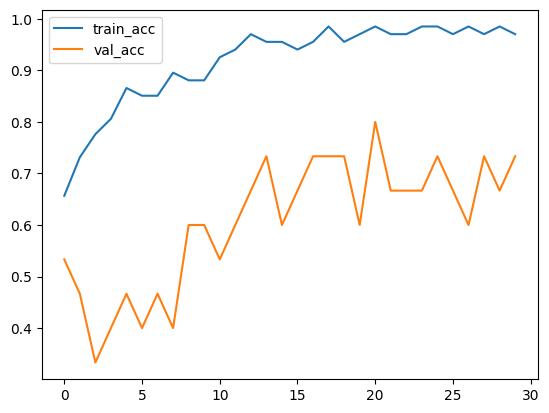

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


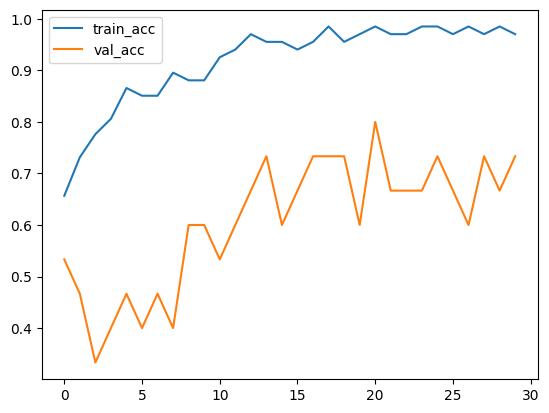

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = pred[0][class_idx]

    print(f"Predicted: Person {class_idx + 1} with {confidence:.2f} confidence")

predict_image("/content/drive/MyDrive/Pictures/ahadu.PNG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: Person 2 with 0.89 confidence


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

class_names = ['Dawit','Hadush','Kahsay']
for img_path in ['/content/drive/MyDrive/Colab Notebooks/dataset/1000005407.jpg', '/content/drive/MyDrive/Pictures/2.3.PNG' , '/content/drive/MyDrive/Colab Notebooks/dataset/Kahsay/IMG_20250515_115616_714.jpg']:
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
    pred = model.predict(arr)[0]
    idx = np.argmax(pred); prob = pred[idx]
    label = class_names[idx] if prob>=0.5 else "Unknown"
    print(f"{img_path}: {label} ({prob:.2f} confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
/content/drive/MyDrive/Colab Notebooks/dataset/1000005407.jpg: Hadush (0.97 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
/content/drive/MyDrive/Pictures/2.3.PNG: Unknown (0.39 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
/content/drive/MyDrive/Colab Notebooks/dataset/Kahsay/IMG_20250515_115616_714.jpg: Kahsay (0.99 confidence)


In [14]:
model.save("face_recognition_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("face_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpemzbn0s2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 112, 112, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137697794856848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137697794856464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137697794859344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137697794856656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137697794859536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137697794857808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137694922416848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137694922416656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137694922417232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137694922417616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13769492241780

In [3]:
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="face_model.tflite")
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]['index']
out = interpreter.get_output_details()[0]['index']


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
